In [1]:
import pandas as pd
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 문제정의

In [2]:
data.shape

(8124, 23)

In [3]:
# 리프 노드로 분리 가능한 최소 샘픔의 개수 : min_sample_split
# 20개 미만이라고 할 때 20씩 나눠지는 현상? 
# 리프 노드를 구성하는 최소 샘픔의 개수 : min_samples_leaf
# 최소 20개를 가지고 있어야하기 때문에 20개 밑으로 분할이 되지 않는다?

# 데이터 전처리


## 결측치

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 탐색적 데이터 분석 

# 모델 선택 및 하이퍼 파라미터 튜닝 

In [5]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X= data.loc[:, 'cap-shape' :]
y= data.loc[:, 'poisonous']

## 인코딩
- 글자 데이터를 수치 데이터로 변환하는 작업

In [7]:
# label Encoding : 수치 값으로 mapping하는 작업 
# one-hot Encoding : 0 or 1 의 값을 가진 여러개의 새로운 특성으로 변경하는 작업 


### label 인코딩 

In [8]:
X1 = X.copy()

In [9]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [10]:
X1['cap-shape'].map({"x":0, "f":1, "k":2, "b":3, "s":4, "c":5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

###  onehot 인코딩

In [11]:
X2 = X.copy()

In [12]:
# 원핫인코딩할 컬럼 뽑아서 넣어줘야함 
X_one_hot = pd.get_dummies(X2)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 훈련과 평가로 데이터 분리  

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3)

## 모델 불러오기 

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

# 학습 

In [16]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

# 평가


In [17]:
tree_model.score(X_train, y_train)

1.0

In [18]:
tree_model.score(X_test, y_test)

1.0

In [19]:
!pip install graphviz

In [20]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [26]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity= True,
               filled=True)

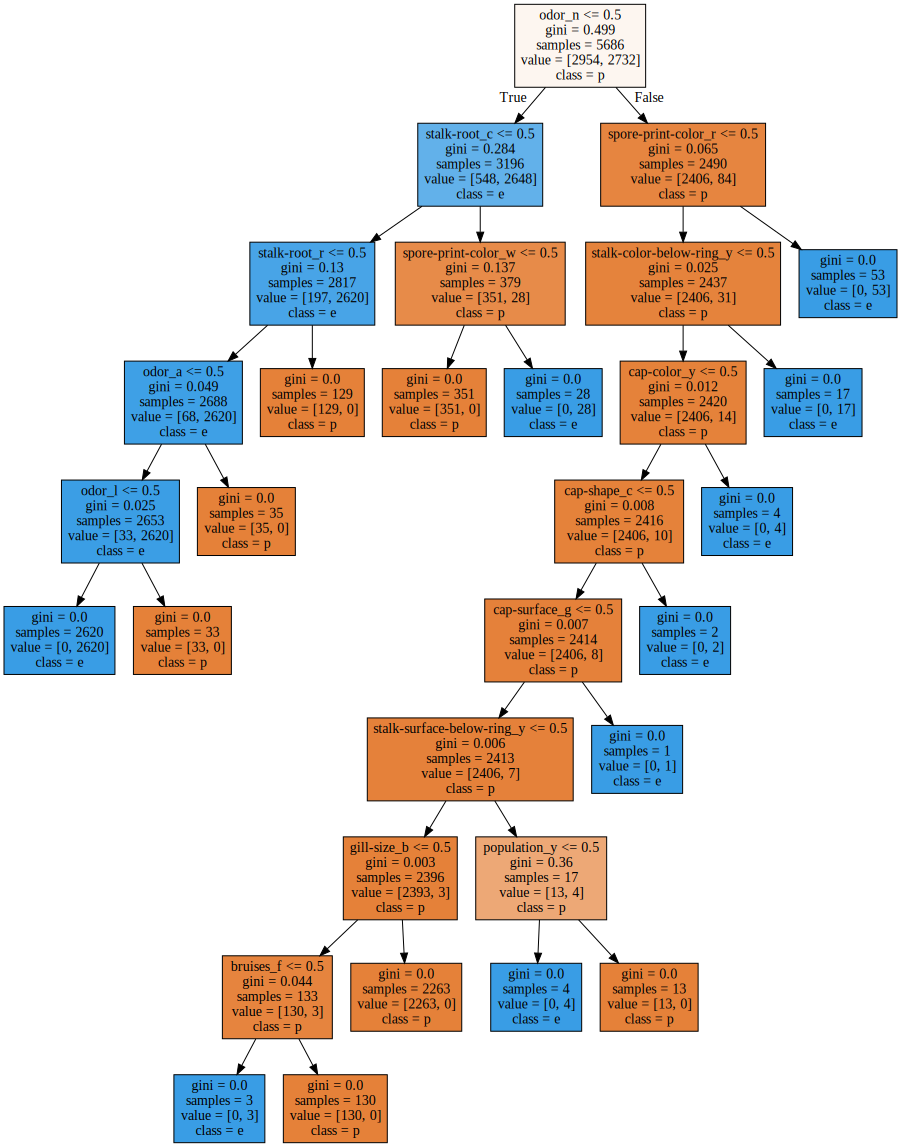

In [27]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [28]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

# 과대적합 제어

## leaf node: 10개로 조정
- 1. leaf node의 수를 10개로 조정한 decisiontree모델 생성
- 2. decisiontree모델 학습
- 3. decisiontree모델 평가
- 4. 시각화

In [31]:
tree_model2 = DecisionTreeClassifier(max_leaf_nodes = 10)

In [35]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [36]:
tree_model2.score(X_train, y_train)

0.9975378121702427

In [39]:
tree_model2.score(X_test, y_test)

0.9958982772764561

In [40]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=X_one_hot.columns,
               impurity= True,
               filled=True)

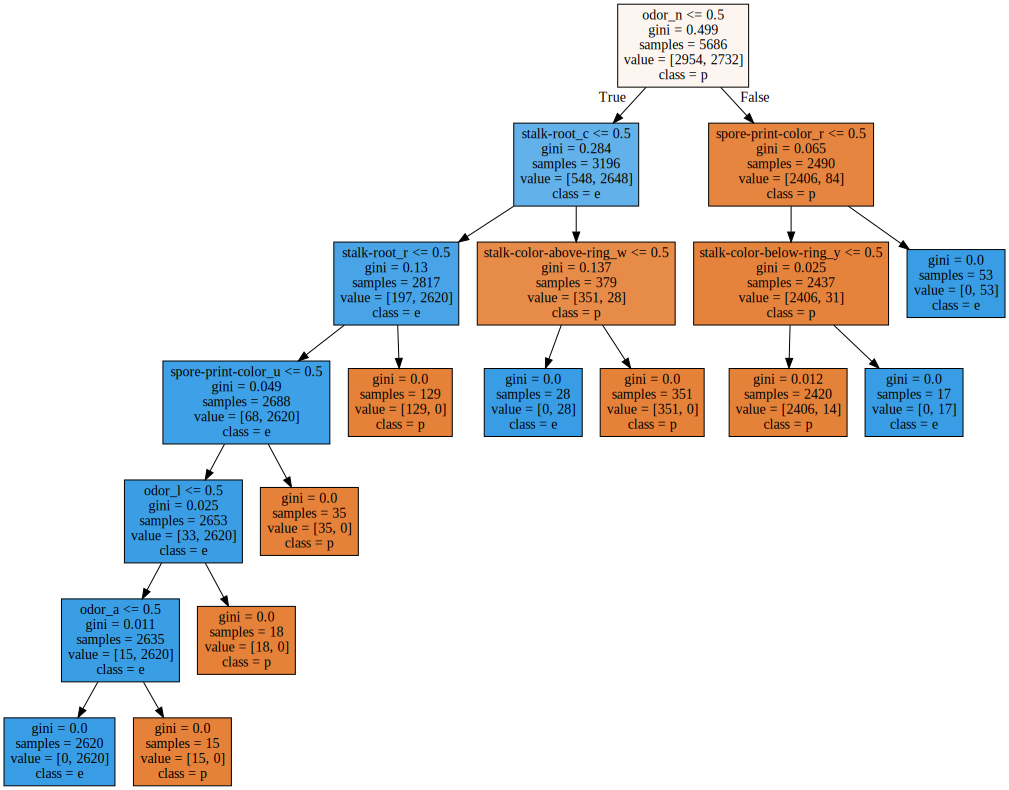

In [41]:
import graphviz

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [42]:
from subprocess import check_call
check_call(['dot','-Tpng','tree2.dot','-o','tree2.png'])

0

# 교차검증

In [46]:
from sklearn.model_selection import cross_val_score
# 사용할 모델, 문제, 정답, 데이터 분할 수 
cross_val_score(tree_model, X_train, y_train, cv = 5).mean()

1.0

# 특성 선택 

In [50]:
fi = tree_model.feature_importances_
# 트리 모델에 train 데이터로 117개의 특성을 사용하고 있는데 
# 특성의 중요도를 나타내고 있는 값이다 
# 117개에 대한 중요도의 합은 1이다 
# e를 전후로 나눠서 생각하면 되는데 e 전은 숫자이고 e 후는 몇 제곱할 것이냐 -03은 10의 3승 
# 0은 아무런 영향을 끼치지 않았다. 
# 0이 아닌 다른 숫자는 숫자만큼 영향을 미쳤다고 해석하면 된다. 

In [54]:
fi_df = pd.DataFrame(fi, index = X_train.columns)
fi_df.sort_values(by = 0, ascending = False).head(10)

,0
odor_n,0.622919
stalk-root_c,0.172534
stalk-root_r,0.082393
spore-print-color_r,0.035623
odor_a,0.023737
odor_l,0.022961
spore-print-color_w,0.018270
stalk-color-below-ring_y,0.011757
cap-color_y,0.002790
population_y,0.002155


In [57]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)
cross_val_score(tree. X_train, y_train, cv = 5)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'X_train'

In [58]:
tree.score(X_test, y_test)

0.9938474159146842

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : range(1,10),
    'max_leaf_nodes' : range(10,20)
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(10, 20)})

In [60]:
grid.best_score_

1.0

In [61]:
grid.best_params_

{'max_depth': 9, 'max_leaf_nodes': 17}